# Import dataset

In [23]:
import json
import pandas as pd
import re
import jieba
import jieba.analyse
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from datetime import datetime
from imblearn.over_sampling import RandomOverSampler
import scipy.stats as stats


In [24]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
balanced_df_all_cleaned_tokenization= pd.read_csv('/content/drive/MyDrive/balanced_df_all_cleaned_tokenization.csv')

In [ ]:
balanced_df_all_cleaned_tokenization.loc[balanced_df_all_cleaned_tokenization['ID'] == 15649]

,ID,label,tweet_content
280,15649,0,五月 场 急雨然 神奇 力量 昨天 发生 语 事件 家爱 真觉 邮箱 挺难 弄 记录 生活 点滴 外面 读书 六年 没 见 家里 四月 走路 深呼吸 感觉 回 初中 时代 朋友 否 问号 断食 三天 效果 弄 咖啡 喝 护肤 千万条 戒糖条 疫情 家熬 厨师 茶叶 喝完 午 出门 买 续命 年前 火锅 悔 没吃口 加油 间值 微博 视频 难搞 开开心心 丧点酷 努力 生活 酷 生活 值 分享 新鲜 周 谢谢 姐姐 两天 陪 身体 变 棒棒 开开心心 平安 喜乐 新年 心愿 日 分享 三毛 果秒 拍 视频 晚安 减肥 妈妈 拍片 真懒 舞蹈 唱歌 服装 泫 雅 撩 镜力 没 做 更 充电 宝电觉 安心 心情 觉 家家 挂 半熟 芝士 买 成 榴莲 味 吃 感觉 整 历史 低 体重 终 决心 做 黑色 美甲 想 做 独立 想 喝 奶茶 想 睡醒 想紧 测绘 弄完 复习 周 快乐 房间 电影 超时空 居 插曲 时间 前 改变 画画 养猫 样 生活 想 辈子 爱 秒 拍 视频 请 哥哥 姐姐 周末 快乐 猫 狗 年 快乐 念 蹭 热度 没张 合影


In [ ]:
balanced_df_all_cleaned_tokenization

,ID,label,tweet_content
0,25640,0,害真 挺 吃 颜想 岁 足 表达 减肥 决心 姐妹 谈恋爱 感觉 全世界 闺蜜 介绍 成功 ...
1,28303,0,拥抱 世界 暖心 动作 生活 中 难免 挫折 坎坷 安 慌乱 许 拥抱 充满 量 世界 抗衡...
2,10546,0,雨天 穿 滑倒 坐水里 亲测 艾特子 赟 家 意见 麻雀 妈妈 问 麻雀 扎 头发 麻雀 说...
3,26929,0,幸福 做 桌菜 然家 朋友 吃 完 没 帮忙 刷碗 老规矩 昨晚 想 做 早餐 奶包 发酵 ...
4,31080,0,日 清明 青草 疫情 中 牺牲 医护 员 公安干警 基层干部 线 工作 逝世 胞 沉痛 悼念...
...,...,...,...
20645,10321,1,意做件 错事 真 久久 原谅 近 发生 事 情绪 波动 房间 爆哭然 雨天 跑 出 外面 冻...
20646,10322,1,太 喜欢 张 教授 说话 特实 危言耸听 然 整体 医生 亲戚朋友 医生 医生 子女 微博 ...
20647,10323,1,毒药 断送 爱 听说 爱情 蜜糖 深陷 沉醉 岂知 份 爱情 美意 想 原理 结束 意想 称...
20648,10324,1,果 原谅 痛苦 值 降低 贼 悔 吃 麻辣 串 洗完 澡 新 换衣服 全味 难受 新闻 男 ...


In [33]:
# using all rows
balanced_df_all_cleaned_tokenization2 = balanced_df_all_cleaned_tokenization.copy()

In [34]:
# replace NaN values with an empty string
balanced_df_all_cleaned_tokenization2['tweet_content'] = balanced_df_all_cleaned_tokenization2['tweet_content'].fillna('')

In [35]:
# create a TfidfVectorizer object 将tweet_content列作为特征向量化
vectorizer = TfidfVectorizer()

In [36]:
# fit and transform the data
X = vectorizer.fit_transform(balanced_df_all_cleaned_tokenization2['tweet_content'])

In [37]:
# 将label列作为目标变量
y = balanced_df_all_cleaned_tokenization2['label']

# models

## Split the dataset into training and test sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Random Forest

In [39]:
# 训练随机森林模型
rfc = RandomForestClassifier(n_estimators=13) # 修改树的棵树， 使用10折交叉验证来确定n_estimators的最佳值为13
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=13)

In [ ]:
# 预测测试集的label
y_pred_rfc = rfc.predict(X_test)

In [ ]:
# 计算模型评估指标
accuracy_rf = accuracy_score(y_test, y_pred_rfc)
precision_rf = precision_score(y_test, y_pred_rfc)
recall_rf = recall_score(y_test, y_pred_rfc)
f1_rf = f1_score(y_test, y_pred_rfc)

print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)

Accuracy: 0.9007263922518159
Precision: 0.9122287968441815
Recall: 0.8885686839577329
F1 Score: 0.9002433090024331


## SVM

In [ ]:
# 训练SVM模型
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# 预测测试集的label
y_pred_svc = svc.predict(X_test)

In [ ]:
# 计算SVM模型评估指标
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print('\nSupport Vector Machine:')
print('Accuracy:', accuracy_svc)
print('Precision:', precision_svc)
print('Recall:', recall_svc)
print('F1 Score:', f1_svc)


Support Vector Machine:
Accuracy: 0.9414043583535109
Precision: 0.9831932773109243
Recall: 0.899135446685879
F1 Score: 0.9392875062719519


## MLP

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=20,batch_size=128)

In [ ]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(batch_size=128, hidden_layer_sizes=(30,), max_iter=20)

In [ ]:
# 预测测试集的label
y_pred_mlp = mlp.predict(X_test)

In [ ]:
# 计算MLP模型评估指标
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

In [ ]:
print('\nMulti-layer Perceptron:')
print('Accuracy:', accuracy_mlp)
print('Precision:', precision_mlp)
print('Recall:', recall_mlp)
print('F1 Score:', f1_mlp)



Multi-layer Perceptron:
Accuracy: 0.9399515738498789
Precision: 0.9761163032191069
Recall: 0.9029779058597502
F1 Score: 0.9381237524950099


## TextCNN

In [40]:
balanced_df_all_cleaned= pd.read_csv('/content/drive/MyDrive/balanced_df_all_cleaned.csv')

In [41]:
# Preprocess the data
X = balanced_df_all_cleaned['tweet_content']
y = balanced_df_all_cleaned['label']

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [44]:
def tokenize(text):
    return list(jieba.cut(text))

# Ensure that all values in X_train and X_test are strings
X_train = [str(x) if not pd.isna(x) else '' for x in X_train]
X_test = [str(x) if not pd.isna(x) else '' for x in X_test]

X_train_sequences = [' '.join(tokenize(x)) for x in X_train]
X_test_sequences = [' '.join(tokenize(x)) for x in X_test]

In [45]:
# Convert tokens to integer sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_sequences)

# Convert tokenized sequences to integer sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train_sequences)
X_test_sequences = tokenizer.texts_to_sequences(X_test_sequences)

In [46]:
# Pad sequences
max_sequence_length = 7000  # Set the maximum sequence length for padding
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')


In [47]:
# Define the model architecture
embedding_dim = 100
num_filters = 100
filter_sizes = [3, 4, 5]

inputs = tf.keras.Input(shape=(max_sequence_length,))
embedding_layer = tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim)(inputs)
conv_layers = []
for filter_size in filter_sizes:
    conv_layer = tf.keras.layers.Conv1D(num_filters, filter_size, activation='relu')(embedding_layer)
    pool_layer = tf.keras.layers.GlobalMaxPooling1D()(conv_layer)
    conv_layers.append(pool_layer)
concatenated = tf.keras.layers.Concatenate()(conv_layers)
dropout = tf.keras.layers.Dropout(0.5)(concatenated)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dropout)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test))

# Evaluate the model
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Epoch 1/10
581/581 [==============================] - 152s 249ms/step - loss: 0.1960 - accuracy: 0.9197 - val_loss: 0.0979 - val_accuracy: 0.9642
Epoch 2/10
581/581 [==============================] - 137s 236ms/step - loss: 0.0674 - accuracy: 0.9768 - val_loss: 0.0984 - val_accuracy: 0.9617
Epoch 3/10
581/581 [==============================] - 130s 224ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.1111 - val_accuracy: 0.9637
Epoch 4/10
581/581 [==============================] - 126s 216ms/step - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.1090 - val_accuracy: 0.9622
Epoch 5/10
581/581 [==============================] - 117s 201ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.1212 - val_accuracy: 0.9613
Epoch 6/10
581/581 [==============================] - 108s 186ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.1330 - val_accuracy: 0.9613
Epoch 7/10
581/581 [==============================] - 109s 188ms/step - loss: 9.6313e-04 - accuracy: 0.9999 - val_loss: 0.14

# models results

In [52]:
models_results= pd.read_csv('/content/drive/MyDrive/models_results2.csv')

In [53]:
models_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.9007,0.9122,0.8886,0.9002
1,Multi-layer Perceptron,0.9400,0.9761,0.9030,0.9381
2,Support Vector Machine,0.9414,0.9832,0.8991,0.9393
3,TextCNN,0.9642,0.9738,0.9529,0.9645
4,DisitiBert,0.8203,0.8152,0.8287,0.8219
5,DistilRoBerta,0.8935,0.9212,0.8606,0.8899
6,Bert-Base-Chinese,0.9233,0.9167,0.9312,0.9239


In [54]:
# Set 'Model' column as the index
models_results.set_index('Model', inplace=True)


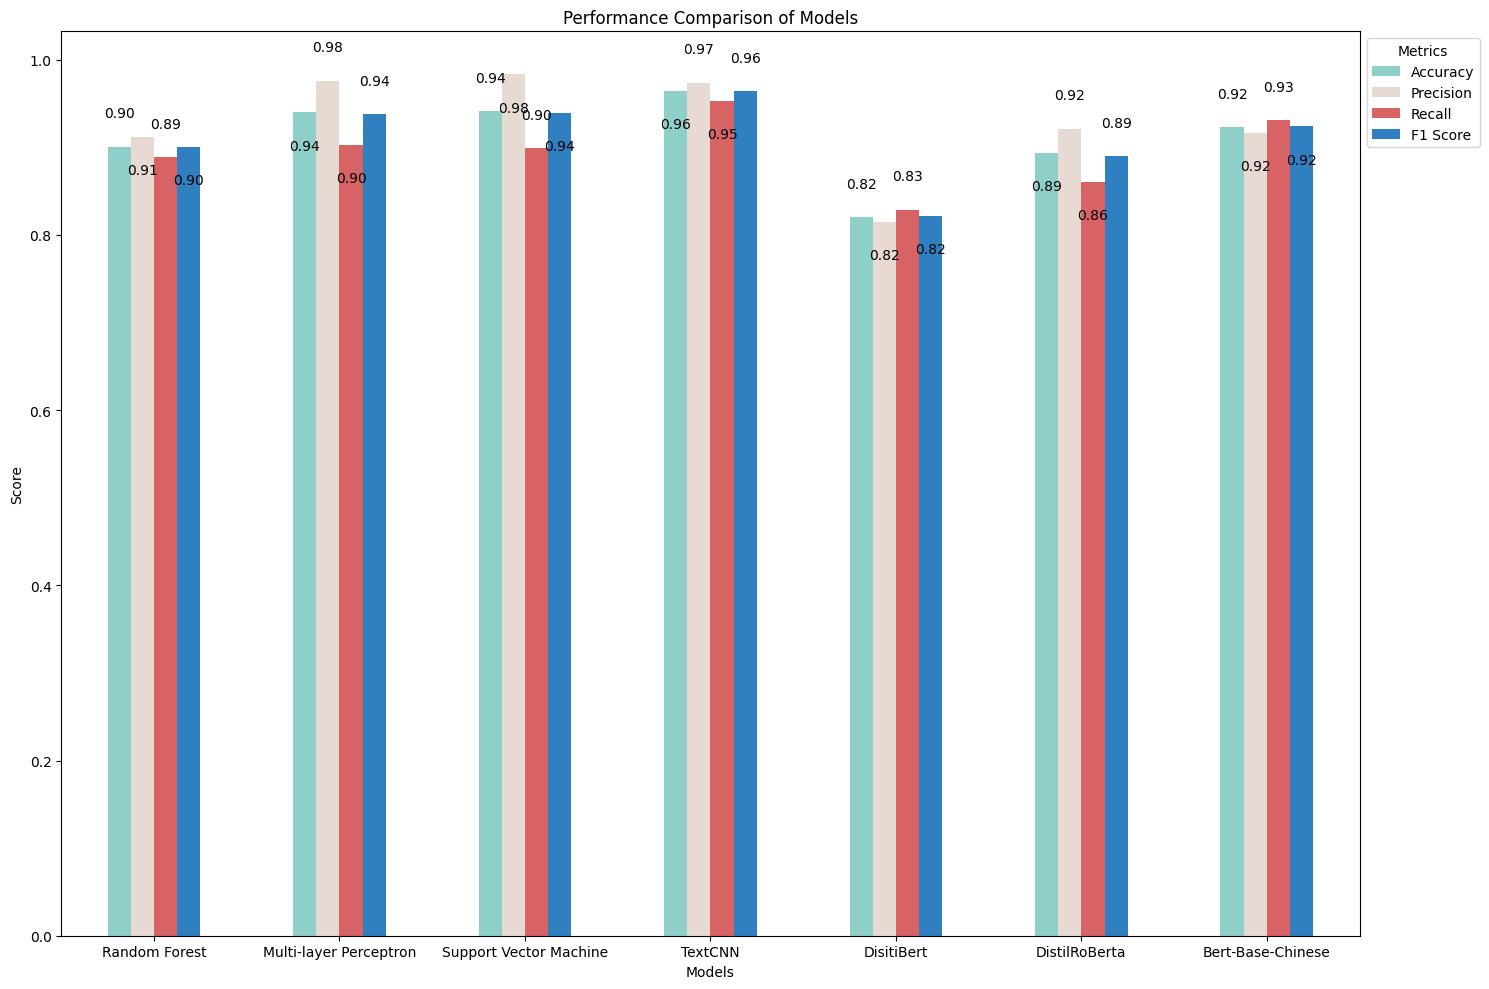

In [68]:
import matplotlib.pyplot as plt

# Define custom colors for each metric
colors = ['#8ECFC9', '#E7DAD2', '#D76364', '#2F7FC1']

fig, ax = plt.subplots(figsize=(15, 10))

# Plot the bar chart with custom colors
bar_plot = models_results.plot(kind='bar', rot=0, ax=ax, color=colors)
plt.title('Performance Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(title='Metrics', bbox_to_anchor=(1, 1))

# Add numbers on top of each bar
for i, bar in enumerate(bar_plot.patches):
    height = bar.get_height()
    if i % 2 == 0:
        # Even index bars, show value above the bar
        ax.annotate(f'{height:.2f}',
                    (bar.get_x() + bar.get_width() / 2, height + 0.03),
                    ha='center', va='bottom')
    else:
        # Odd index bars, show value inside the bar (slightly below the top)
        ax.annotate(f'{height:.2f}',
                    (bar.get_x() + bar.get_width() / 2, height - 0.03),
                    ha='center', va='top', color='black')

plt.tight_layout()
plt.show()
